# FMP Stock Fundamentals Exploration 8 : Price Target

Welcome to this Jupyter Notebook of the Finsloth.

Our goal is to understand **the meaning and the structure of each data given by FMP, how to transform it for actual use in any trading or investing strategies**.

## About Financial Modeling Prep

Financial Modeling Prep is a stock market API that provides a wide range of data. Data covers stocks, crypto forex and commodities.

You have addition data such as institutional stock ownership, esg score, price target, etc.

There are several plans including a free one.

I am on a start plan for this notebook. Here are the link for the pricing: https://site.financialmodelingprep.com/developer/docs/pricing/

## Price Target

A price target is an **analyst's projection of a security's future price**. Price targets can pertain to all types of securities, from complex investment products to stocks and bonds. When setting a stock's price target, **an analyst is trying to determine what the stock is worth and where the price will be in 12 or 18 months**. Ultimately, price targets depend on the valuation of the company that's issuing the stock.

Analysts from various banks provide their **target price done through various type of analysis which include technical, fundamental and economical**.

However, an investor should always make their own due diligence when it comes to investing, as **studies show the overall accuracy for price targets is around 30%**.

source: https://www.investopedia.com/terms/p/pricetarget.asp

### Price target on Financial Modelling Prep

Price target on Financial Modelling Prep is divided in 6 main section:
- Price target per company: price target given by several analysts,
- Price targe Summary: which sums up statistically all the analysis made,
- Price target by analyst name,
- Price target consensus: the average of analysts' individual price targets and quoted in the financial press (source= Seeking Alpha),
- Price target RSS Feed.

We won't explore all the price targets, but focus on useable content for analysis which include a minimum of price convergence.

**NB: Price target is only available for Professional and Enterprise Plan.**

## Initial Import and API Key

In this section, we are going to perform classic libraries import to perform our data transformation and visualisation.

In [2]:
# We import the basics and some specific to APIs libraries

# Basic Data Manipulation Librairies
import pandas as pd

# requests is another way of sending an API request to FMP
import requests

# json library makes it easier to access JSON format
import json

For privacy reason, I have hidden my key to access the API.

Here is the link to the dashboard where you can find your private key in case you created an account: https://site.financialmodelingprep.com/developer/docs/dashboard

In [3]:
# Because I want to share this file on Github, I made sure that it's not showing the actual key.
key='your key'

FMP provides us the right method to extract data from its API according to the coding language you are using.

Here is the function they provided us to extract data with Python.

## Price Target

This endpoint is the foundation of all the different price target endpoitns around price targets.

The only input required for this endpoint is the symbol of the chosen security.

It will provide key info such as the published date, the price target and adjusted, the name of the analyst and his/her company.

In [5]:
# Building url
url1 = 'https://financialmodelingprep.com/api/v4/price-target?symbol=AAPL&apikey='+key

# Calling our url
# pt stands for price targets
pt = requests.get(url1).json()

# Inspecting
pt[:5]

[{'symbol': 'AAPL',
  'publishedDate': '2022-09-21T08:11:00.000Z',
  'newsURL': 'https://www.benzinga.com/trading-ideas/long-ideas/22/09/28938578/the-top-3-most-accurate-analyst-firms-have-the-exact-same-price-target-on-apple-stock',
  'newsTitle': 'Top 3 Most Accurate Analyst Firms Have The Exact Same Price Target On Apple Stock',
  'analystName': 'Brandon Nispel',
  'priceTarget': 177.0,
  'adjPriceTarget': 177.0,
  'priceWhenPosted': 156.9,
  'newsPublisher': 'Benzinga',
  'newsBaseURL': 'benzinga.com',
  'analystCompany': 'Citigroup'},
 {'symbol': 'AAPL',
  'publishedDate': '2022-09-20T08:49:00.000Z',
  'newsURL': 'https://www.benzinga.com/news/22/09/28930276/evercore-isi-group-maintains-outperform-on-apple-raises-price-target-to-190',
  'newsTitle': 'Evercore ISI Group Maintains Outperform on Apple, Raises Price Target to $190',
  'analystName': None,
  'priceTarget': 190.0,
  'adjPriceTarget': 190.0,
  'priceWhenPosted': 156.695,
  'newsPublisher': 'Benzinga',
  'newsBaseURL': 'b

One very interesting fact is that most information are extracted from a defined list of published which include "TheFly" and "Benziga".

Furthermore, these information from articles in which text has been parsed to tather key information.

Let's transform our information into dataframes to see more clearly what's inside each key, value pair.

In [7]:
# Building our pandas DataFrame
ptdf = pd.DataFrame(pt)

# Inspecting
ptdf.head()

,symbol,publishedDate,newsURL,newsTitle,analystName,priceTarget,adjPriceTarget,priceWhenPosted,newsPublisher,newsBaseURL,analystCompany
0,AAPL,2022-09-21T08:11:00.000Z,https://www.benzinga.com/trading-ideas/long-id...,Top 3 Most Accurate Analyst Firms Have The Exa...,Brandon Nispel,177.0,177.0,156.900,Benzinga,benzinga.com,Citigroup
1,AAPL,2022-09-20T08:49:00.000Z,https://www.benzinga.com/news/22/09/28930276/e...,Evercore ISI Group Maintains Outperform on App...,None,190.0,190.0,156.695,Benzinga,benzinga.com,Evercore ISI
2,AAPL,2022-09-08T00:07:00.000Z,https://www.benzinga.com/news/22/09/28787739/a...,Apple Analyst Sees iPhone 14 Boost From Pent U...,Dan Ives,220.0,220.0,155.960,Benzinga,benzinga.com,Wedbush
3,AAPL,2022-09-08T00:00:00.000Z,https://thefly.com/permalinks/entry.php/id3578...,Apple integrated approach to design has little...,Martin Yang,190.0,190.0,155.960,TheFly,thefly.com,Oppenheimer
4,AAPL,2022-09-08T00:00:00.000Z,https://thefly.com/permalinks/entry.php/id3578...,Apple later launch of iPhone 14 Plus a 'small ...,Erik Woodring,180.0,180.0,155.960,TheFly,thefly.com,Morgan Stanley


This could easily be used in a terminal where it's possible to see all the different price targets for each security.

## Price Consensus

The consensus price target is the average of analysts' individual price targets. This is the price target that investors will most often see quoted in the financial press.

In [8]:
# Building our url
url2 = 'https://financialmodelingprep.com/api/v4/price-target-consensus?symbol=AAPL&apikey='+key

# Calling our url
# We'll call this pc for Price Consensus
pc = requests.get(url2).json()

# Inspecting
pc

[{'symbol': 'AAPL',
  'targetHigh': 220.0,
  'targetLow': 82.0,
  'targetConsensus': 181.34,
  'targetMedian': 185.0}]

It's interesting that we have a price consensus with statistics (High, Low and Median). However, we do not have all the information about the call such as its source, how it's calculated, for which period.

This consensus must be used with cautious.

## Price Target RSS Feed

It's clearly important to grasp that in Finance, following thoroughly the news is key to make sure everyone gets the market movements.

Thus, price target rss feed plays a key role to always have information on top for one's favorite stocks.

Obviously, this would require a professional plan and we were not able to extract the data in the entry point. However, here is a screenshot of the call.

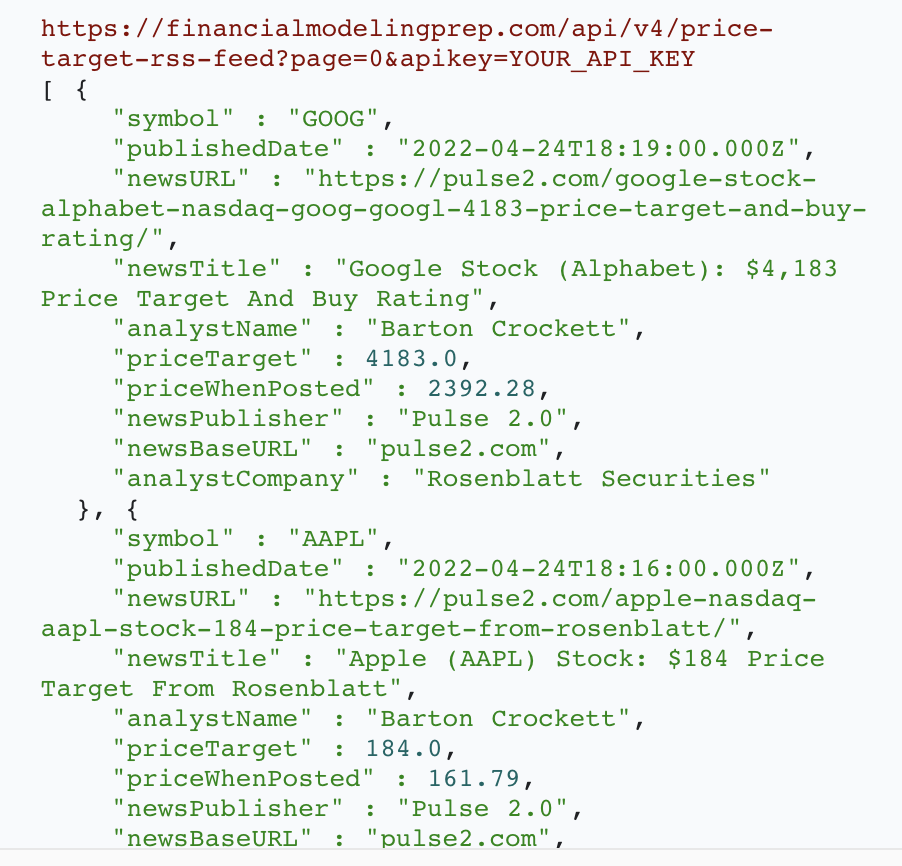

## Conclusion

Price target plays a key role in the analysis of a stock. It helps investor monitor their analysis toward what other analysts have already done. And add some additional key insights in their analysis.

Furthermore, having consensus can help an investor build strong strategy while having an overview of what are the next market trends.